In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 21)

import utils.nervousness_comparator as nerv_comparator

import utils.plotter_proof as proof
import utils.calc as calc

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_schedule_filename(prefix: str = "", day: int = 0, data_txt: str = "schedule", suffix: str = "") -> str:
    file_template = "data/{prefix}_{data}_{day:02d}{suffix}.csv"
    if suffix:
        suffix = f"_{suffix}"
    return file_template.format(prefix=prefix,data=data_txt,day=day, suffix=suffix)

In [4]:
df_plan_init =  pd.read_csv(get_schedule_filename("06", day=0, suffix="init"))
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_000,0,0,1244,M0,0,29,29,-1215,0,1215
1,Job_000,1,0,1244,M1,29,78,107,-1137,0,1137
2,Job_000,2,0,1244,M2,107,9,116,-1128,0,1128
3,Job_000,3,0,1244,M3,116,36,152,-1092,0,1092
4,Job_000,4,0,1244,M4,152,49,201,-1043,0,1043
...,...,...,...,...,...,...,...,...,...,...,...
565,Job_056,5,4192,5894,M9,4655,76,4731,-1163,0,1163
566,Job_056,6,4192,5894,M5,4731,47,4778,-1116,0,1116
567,Job_056,7,4192,5894,M3,4778,52,4830,-1064,0,1064
568,Job_056,8,4192,5894,M4,4830,90,4920,-974,0,974


In [5]:
df_last_ops_init = df_plan_init.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
df_last_ops_init.head()

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,Job_000,9,0,1244,M9,1223,21,1244,0,0,0
19,Job_001,9,80,1687,M8,1657,30,1687,0,0,0
29,Job_002,9,140,1929,M4,1896,33,1929,0,0,0
39,Job_003,9,191,2254,M5,2211,43,2254,0,0,0
49,Job_004,9,226,1465,M6,1412,53,1465,0,0,0


In [6]:
def append_plans_and_last_ops(schedule_prefix: str, last_planning_start: int, df_plan_list: list, df_last_ops_list: list):
    for day_numb in range(1, last_planning_start + 1):
        filename = get_schedule_filename(schedule_prefix, day=day_numb)
        df_plan_temp = pd.read_csv(filename)
        df_plan_temp = df_plan_temp.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
        df_plan_list.append(df_plan_temp)

        df_last_ops = df_plan_temp.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
        df_last_ops_list.append(df_last_ops)


### Mit "Deviation Penalty"

In [8]:
# init devpen
df_plan_devpen_list = []
df_plan_devpen_last_ops_list = []

df_plan_devpen_list.append(df_plan_init)
df_plan_devpen_last_ops_list.append(df_last_ops_init)

In [9]:
append_plans_and_last_ops("06_devpen", last_planning_start = 7,
                          df_plan_list = df_plan_devpen_list,
                          df_last_ops_list = df_plan_devpen_last_ops_list)

In [10]:
df_plan_devpen_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_109,9,8293,10357,M5,10314,43,10357,0,0,0
1,Job_113,9,8512,10214,M7,10169,45,10214,0,0,0
6,Job_115,9,8720,10327,M8,10301,30,10331,4,4,0
8,Job_116,9,8780,10569,M4,10536,33,10569,0,0,0
11,Job_117,9,8831,10894,M5,10851,43,10894,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
625,Job_185,9,14053,16117,M5,16074,43,16117,0,0,0
635,Job_186,9,14059,15298,M6,15245,53,15298,0,0,0
645,Job_187,9,14060,15850,M4,15817,33,15850,0,0,0
655,Job_188,9,14176,15420,M9,15399,21,15420,0,0,0


### Ohne "Deviation Penalty" (Simple)

In [12]:
# init simple
df_plan_simple_list = []
df_plan_simple_last_ops_list = []

df_plan_simple_list.append(df_plan_init)
df_plan_simple_last_ops_list.append(df_last_ops_init)

In [13]:
append_plans_and_last_ops("06_simple", last_planning_start = 7,
                          df_plan_list = df_plan_simple_list,
                          df_last_ops_list = df_plan_simple_last_ops_list)

In [14]:
df_plan_simple_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
1,Job_108,9,8288,9851,M7,10170,25,10195,344,344,0
5,Job_109,9,8293,10357,M5,10365,43,10408,51,51,0
6,Job_111,9,8300,10090,M4,10169,33,10202,112,112,0
7,Job_113,9,8512,10214,M7,10195,45,10240,26,26,0
9,Job_114,9,8640,9884,M9,10129,21,10150,266,266,0
...,...,...,...,...,...,...,...,...,...,...,...
668,Job_185,9,14053,16117,M5,16074,43,16117,0,0,0
678,Job_186,9,14059,15298,M6,15245,53,15298,0,0,0
688,Job_187,9,14060,15850,M4,15817,33,15850,0,0,0
698,Job_188,9,14176,15420,M9,15399,21,15420,0,0,0


## I) Abweichung vom Wunschtermin (Deadline)

### a) Simple

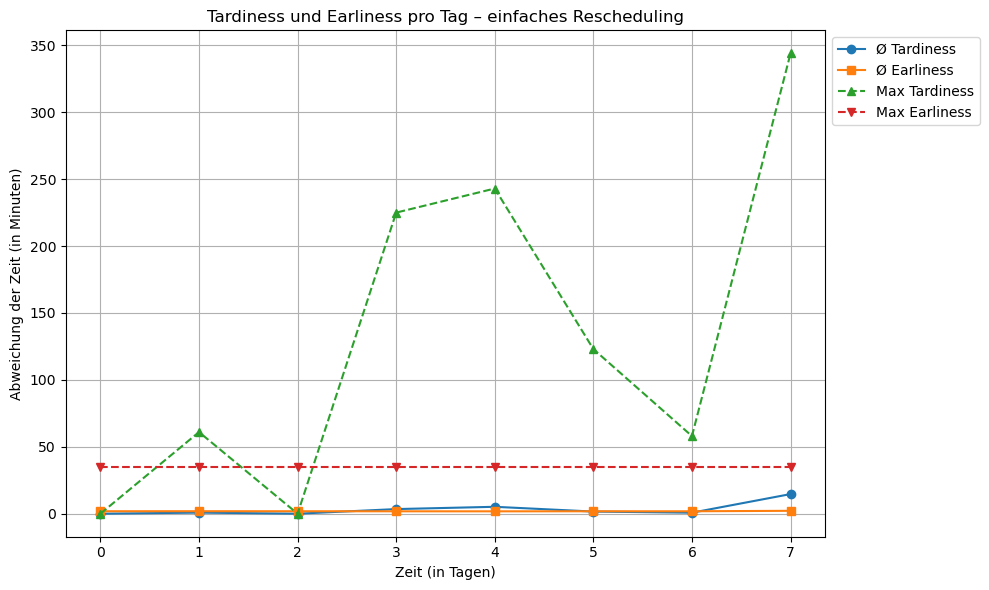

In [17]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_simple_last_ops_list,
                                      subtitle = "einfaches Rescheduling",
                                      show_max=True)


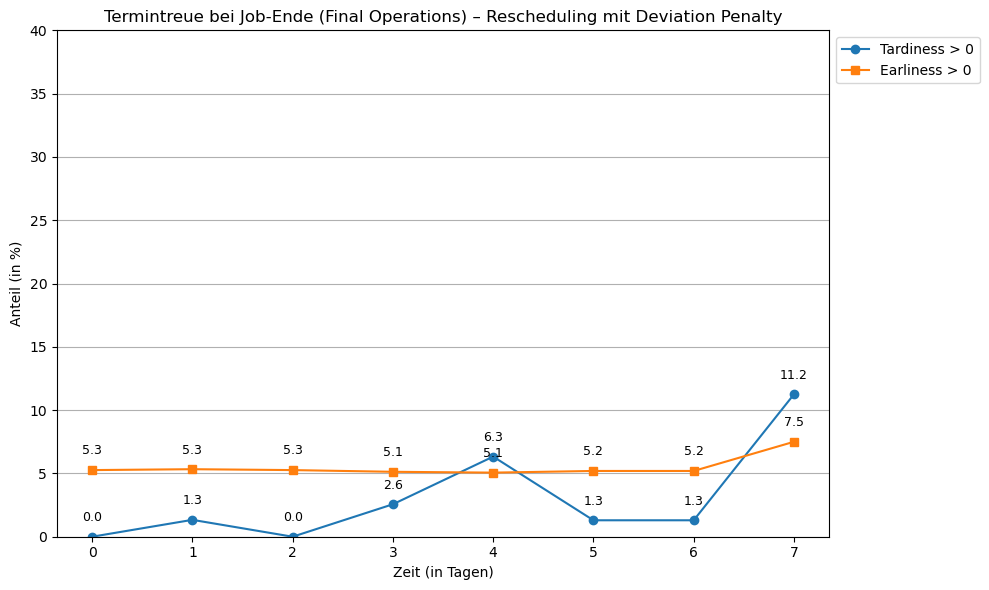

In [18]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    simple_tardi_ratio,
    simple_earli_ratio,
#    simple_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)

### b) Mit Deviation Penalty

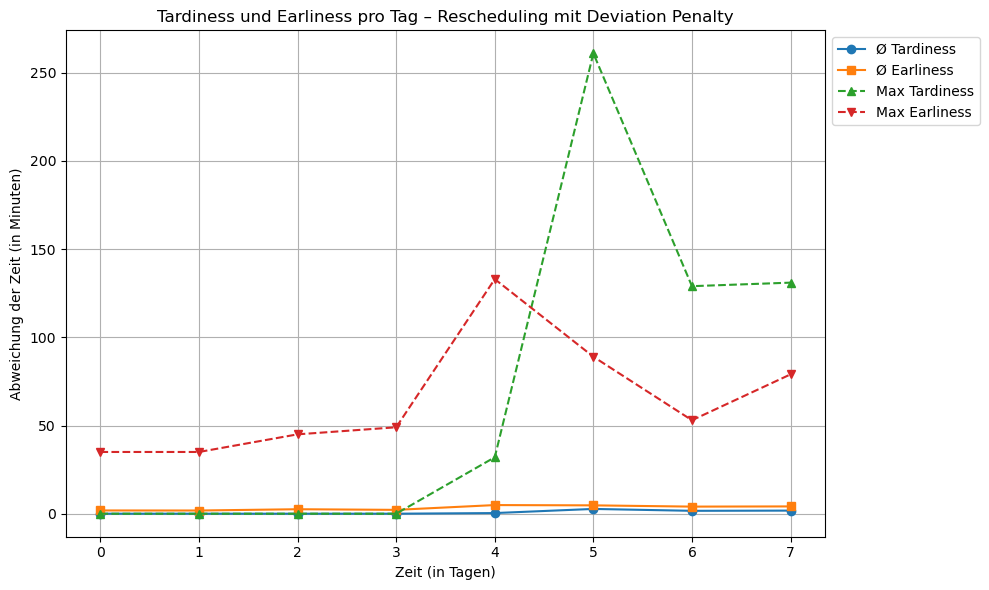

In [20]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_devpen_last_ops_list, 
                                      subtitle = "Rescheduling mit Deviation Penalty",
                                      show_max=True)


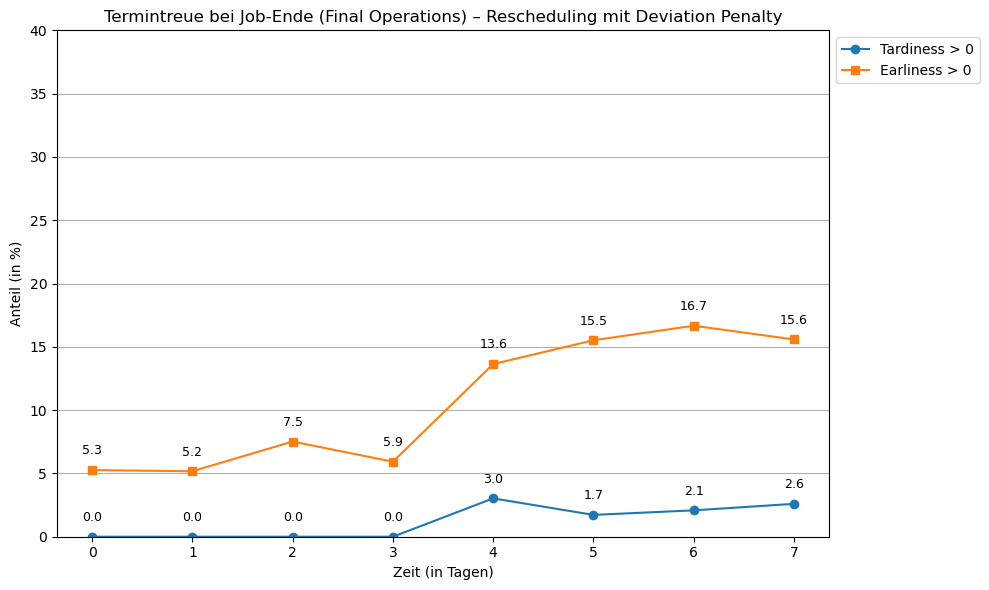

In [21]:
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    devpen_tardi_ratio,
    devpen_earli_ratio,
#    devpen_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)


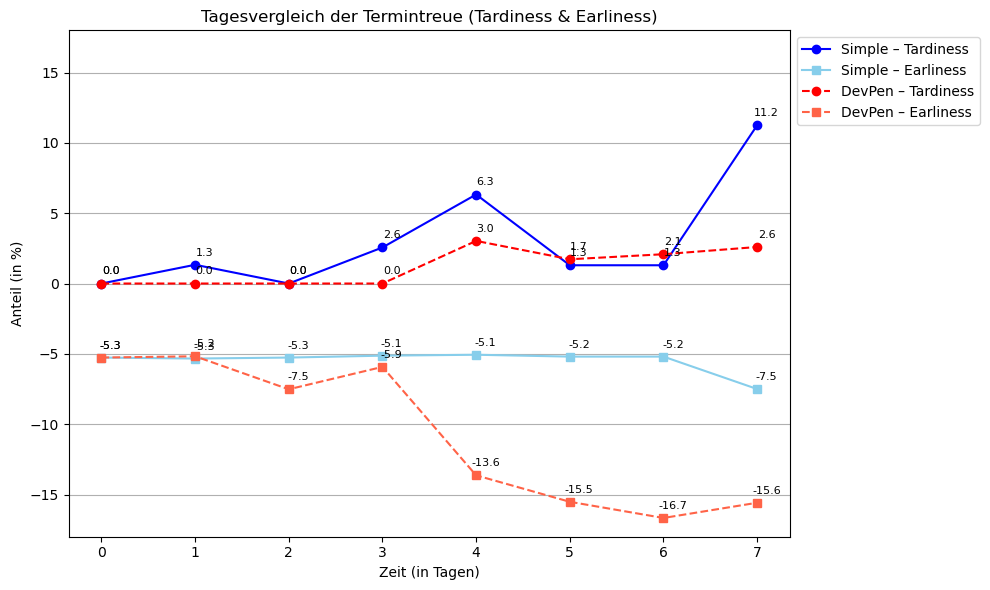

In [22]:
proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    labels=("Simple", "DevPen"),
    title="Tagesvergleich der Termintreue (Tardiness & Earliness)",
    y_lim = 18
)


## II) Plan-Nervosität - Wu

In [24]:
def plot_two_starttime_deviation_bars(dev_A, dev_B,
                                      label_A="Strategie A",
                                      label_B="Strategie B",
                                      title="Vergleich der Startzeitabweichungen jeder Operation pro Tag",
                                      ylabel="Summe der Abweichungen",
                                      xlabel="Tag"):
    days = list(range(len(dev_A)))
    assert len(dev_A) == len(dev_B), "Beide Deviation-Listen müssen gleich lang sein."

    bar_width = 0.4

    plt.figure(figsize=(10, 6))
    bars_A = plt.bar([d - bar_width/2 for d in days], dev_A, width=bar_width, label=label_A, color='darkblue')
    bars_B = plt.bar([d + bar_width/2 for d in days], dev_B, width=bar_width, label=label_B, color='darkred')

    for bar in bars_A:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}",
                 ha='center', va='bottom', fontsize=9)

    for bar in bars_B:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}",
                 ha='center', va='bottom', fontsize=9)

    plt.xlabel(xlabel)
    plt.ylabel(f"{ylabel} (in Minuten)")
    plt.title(title)
    plt.xticks(days)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


### Simple VS mit Deviation Penalty

In [26]:
# Totale Abweichung (Summe)
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list)
deviations_simple

[0.0, 70872, 52017, 61362, 68755, 165829, 95759, 84538]

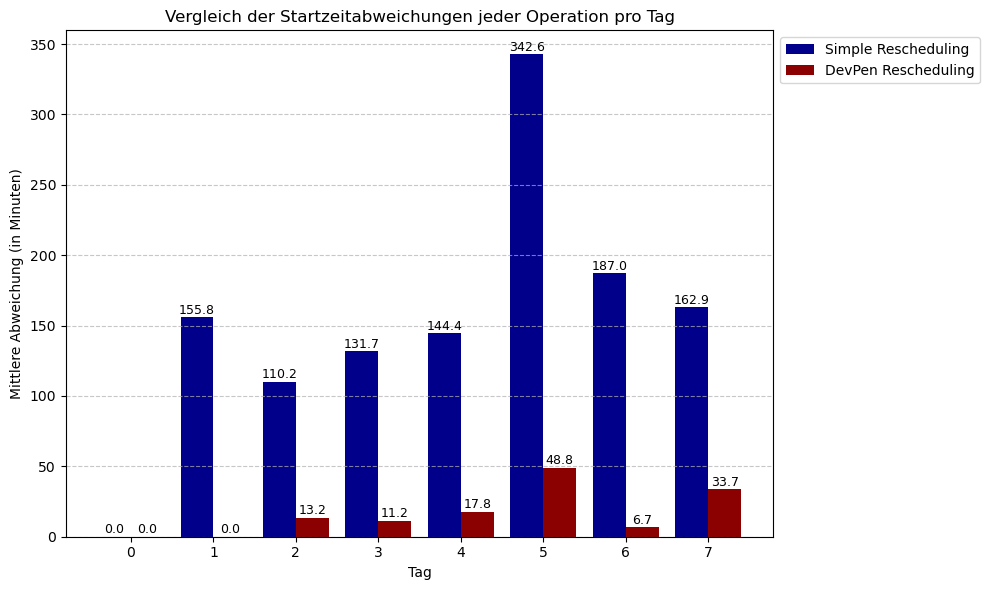

In [27]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean")
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean")

# Plot
plot_two_starttime_deviation_bars(deviations_simple, deviations_devpen,
                                  label_A="Simple Rescheduling",
                                  label_B="DevPen Rescheduling",
                                  ylabel="Mittlere Abweichung")


## Proof of Conecept V1

In [29]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

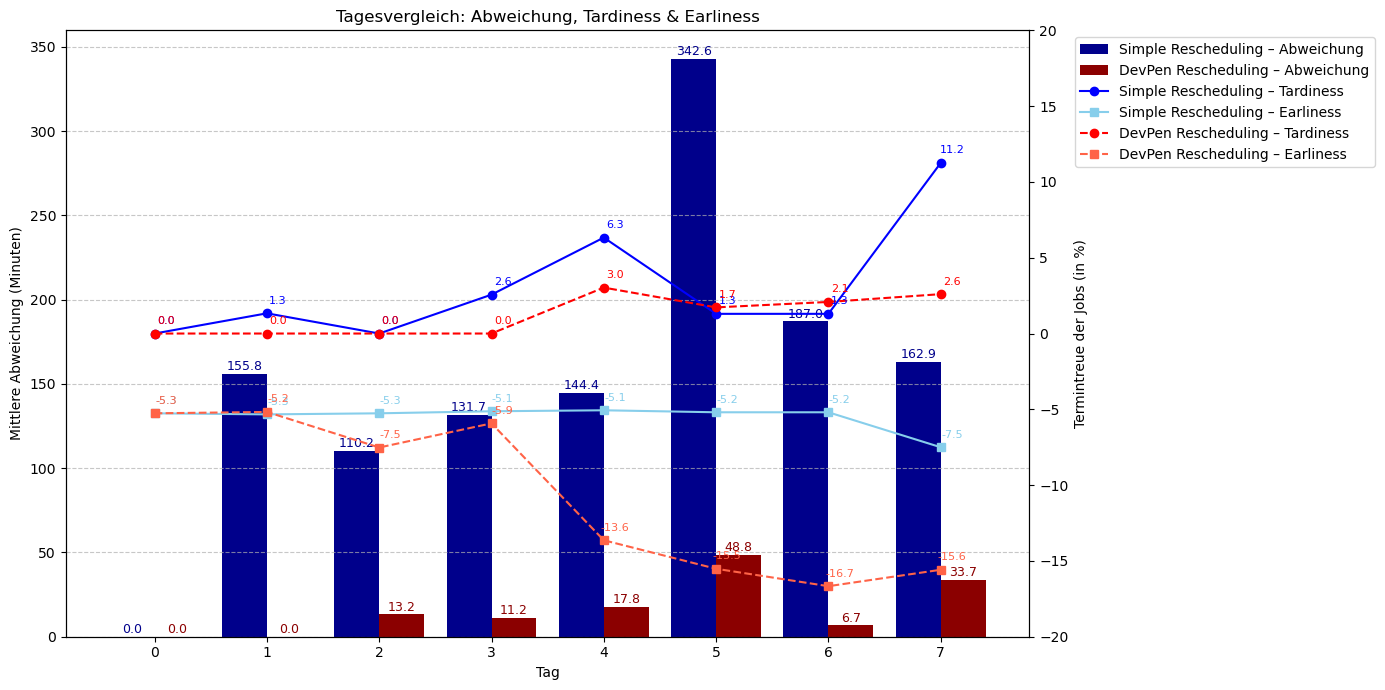

In [56]:
proof.proof_of_concept_v1(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Tardiness & Earliness",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs (in %)",
    y_right_lim=20
)
